### Generating a Random DNA Sequence 

In [1]:
import random

In [2]:
seq = ''.join([random.choice('ACGT') for _ in range(100)])
print(seq)

ATGAGCGTTCTCCGTCGACGAAGGAGCATTACGACTATTAGGGGGGGTGCACGATCAGTATACCGTTCGTGAACAATAACAGTACGATCTTTGGACGCTG


In [3]:
def longestCommonPrefix(s1, s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i+=1
    return s1[:i]

longestCommonPrefix('ATGCGCAC', 'ATGGCATC')

'ATG'

In [4]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t
reverseComplement('ACCATTG')

'CAATGGT'

### Reading a DNA Sequence of a Virus

###### Note : Use ! in the next command only when you are working in a notebook, you can also go directly on the link to download the file.

In [5]:
# !wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

In [6]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if line[0] != '>':
                genome += line.rstrip()
    return genome

genome = readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [7]:
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [8]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

### Analyzing Reads By Position

###### Note : Use ! in the next command only when you are working in a notebook, you can also go directly on the link to download the file

In [9]:
# !wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

In [10]:
def readFastQ(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

seqs, quals = readFastQ('SRR835775_1.first1000.fastq')

###### Note : Qualities are given in phred33 ASCII Encoding , which basically subtracts 33 from Alphabetical ASCII encoding and gives a new character value (Reference : https://en.wikipedia.org/wiki/Phred_quality_score) , this is why we make a method to convert these phred33 encoding to Q-Value for analysis.

In [11]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [12]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


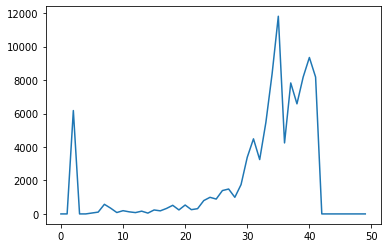

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

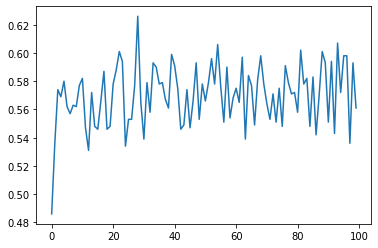

In [14]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

###### Note : N in the next cell represents No-Confidence , i.e, the sequencer was not sure which DNA base was present in that location , the less no. of N's present , the better is the Quality 

In [15]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)

print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


### Naive Exact Matching Algorithm

###### Note : Use ! in the next command only when you are working in a notebook, you can also go directly on the link to download the file

In [16]:
# !wget --no-check http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

In [17]:
genome = readGenome('phix.fa')

###### Note : In the next function we're taking two inputs namely p, t ; here 'p' denotes the pattern sequence and 't' is the reference genome.

In [18]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [19]:
t = ''.join([random.choice('ACGT') for _ in range(100)])
p = 'GC'

print(f"t is {t}")
print(f"p is {p}")

naive(p, t)

t is ATGACCGAGCGATCCGAGGGGGAGTAGCAAGCAAGCTCCGAGCTACGTTTAATTTACCTGTCCTGCACCCCATCCCGGGTCATGCGGTTAAATCAGTCAT
p is GC


[8, 26, 30, 34, 41, 64, 83]

###### Artifically Generating Random Reads from the Sample Genome Sequence.

In [20]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [21]:
reads = generateReads(genome, 100, 100)

In [22]:
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


###### Reading real/natural reads from a FastQ file and then matching it to the genome sequence.

In [23]:
# !wget --no-check http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

In [24]:
phix_reads, _ = readFastQ('ERR266411_1.first1000.fastq')

In [25]:
numMatched = 0
n = 0
for r in phix_reads:
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

7 / 1000 reads matched the genome exactly!


In [26]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

459 / 1000 reads matched the genome exactly!


In [27]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome)) # Taking ReverseComplement
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

932 / 1000 reads matched the genome exactly!


In [28]:
def naive_with_rc(p, t):  # Also Counting Matching Complement Pairs (only once if complement is same)
    occurrences = []
    r = reverseComplement(p)
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if r != p:
            for k in range(len(r)):
                if t[i+k] != r[k]:
                    match = False
                    break
        if match:
            occurrences.append(i)    
    return occurrences

In [29]:
def naive_2mm(p, t):  # Allowing Upto 2 mistmatches per occurance 
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        unmatch = 0
        for j in range(len(p)):
            if t[i+j] != p[j]:
                unmatch += 1
                if unmatch > 2:
                    match = False
                    break
        if match:
            occurrences.append(i)
    return occurrences

###### Note: The reads are taken from this study:
Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate
and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

In [30]:
# !wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

In [31]:
phix_reads, _ = readFastQ('ERR037900_1.first1000.fastq')

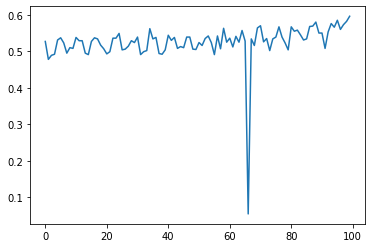

In [32]:
gc = findGCByPos(phix_reads)
plt.plot(range(len(gc)), gc)
plt.show()

In [33]:
for i in range(len(gc)):
    if gc[i] == min(gc):
        print(i)

66


### Boyer-Moore

###### For more information on Z-Algorithm and Bayer Moore :
###### Text Resource : Go Through Chapter 2 of [Algorithms on Strings, Trees, and Sequences](https://doi.org/10.1017/CBO9780511574931)
###### Video Resource : Linear-time pattern matching : Z-values and Z-algorithm [Part 1](https://youtu.be/MFK0WYeVEag) [Part 2](https://youtu.be/NVJ_ELSbbew) 

In [34]:
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [35]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [36]:
t = 'GCTAGCTCTACGAGTCTA'
p = 'TCTA'
p_bm = BoyerMoore(p)

In [37]:
boyer_moore(p, p_bm, t)

[6, 14]